<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import violinplot
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2021-11-01 19:46:36--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2021-11-01 19:46:36--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2021-11-01 19:46:36 (10.9 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2021-11-01 19:46:36--
Total wall clock time: 0.4s
Downloaded: 1 files, 418K in 0.04s (10.9 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [4]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
#No se encontraron elementos faltantes, se deja a continuación el procediminento:
df_clean = df.copy()
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)

In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df_clean.shape

(10000, 3)

In [7]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df_clean.copy()
df2['peso'] = df['Weight'] * 0.453592
df2['altura'] = df['Height'] * 2.54 / 100
df2['sexo'] = df['Gender'].apply(lambda x: 'masculino' if x == 'Male' else 'femenino')
  

In [8]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('Cantidad de datos en observacion:', df2.shape[0])

Cantidad de datos en observacion: 10000


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

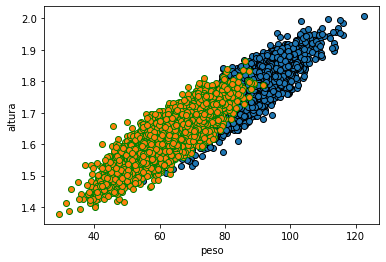

In [9]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df2[df2['sexo'] == 'masculino']['peso'], df2[df2['sexo'] == 'masculino']['altura'], edgecolors='k', label='masculino')
ax.scatter(df2[df2['sexo'] == 'femenino']['peso'], df2[df2['sexo'] == 'femenino']['altura'], edgecolors='g', label='femenino')
ax.set_xlabel('peso')
ax.set_ylabel('altura')
plt.show()



Altura promedio: 1.7532691860179217


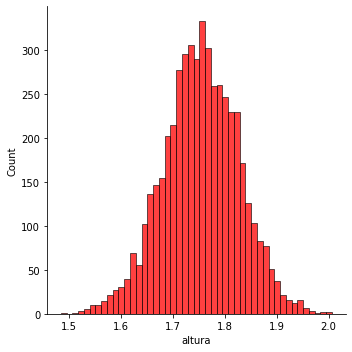

In [10]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

print('Altura promedio:', df2[df2['sexo'] == 'masculino']['altura'].mean())
sns.displot(df2[df2['sexo'] == 'masculino']['altura'],color='r')
plt.show()

Altura promedio: 1.6182028495269973


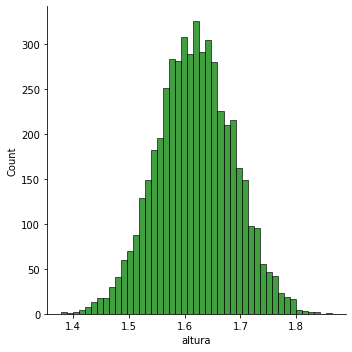

In [11]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio
print('Altura promedio:', df2[df2['sexo'] == 'femenino']['altura'].mean())
sns.displot(df2[df2['sexo'] == 'femenino']['altura'], color='g')
plt.show()

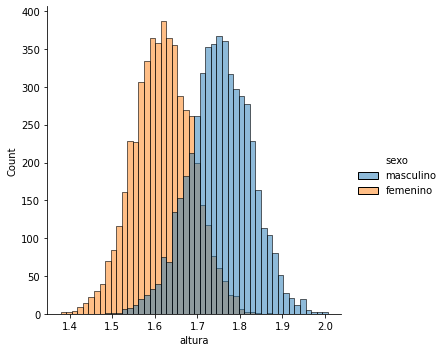

In [12]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")
plt.show()



# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [13]:
# Obtener las variables X e y (para masculino y/o femenino)
df_femenino = df2[ df2['sexo'] == 'femenino']
X_femenino = df_femenino[['peso']].values
y_femenino = df_femenino['altura'].values

df_masculino = df2[ df2['sexo'] == 'masculino']
X_masculino = df_masculino[['peso']].values
y_masculino = df_masculino['altura'].values

# Dividir el dataset en train y test 70%30%
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_femenino, y_femenino, test_size=0.3, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_masculino, y_masculino, test_size=0.3, random_state=42)

# Creamos el modelo base
from sklearn.linear_model import LinearRegression

lr_f = LinearRegression()
lr_f.fit(X_train_f, y_train_f)
y_hat_f = lr_f.predict(X_test_f)

lr_m = LinearRegression()
lr_m.fit(X_train_m, y_train_m)
y_hat_m = lr_m.predict(X_test_m)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [14]:
from sklearn.metrics import r2_score

valuef = r2_score(y_test_f, y_hat_f)
print(f"Coeficiente de determinación femenino: {valuef:.2f}")
valuem = r2_score(y_test_m, y_hat_m)
print(f"Coeficiente de determinación masculino: {valuem:.2f}")

Coeficiente de determinación femenino: 0.73
Coeficiente de determinación masculino: 0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

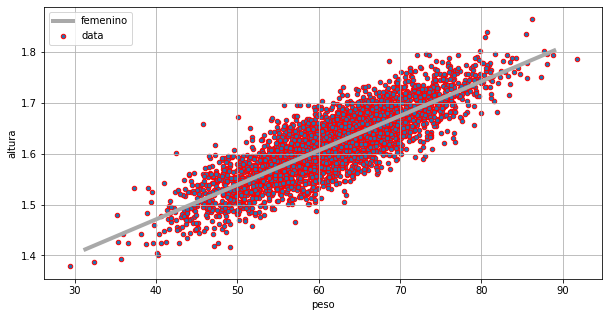

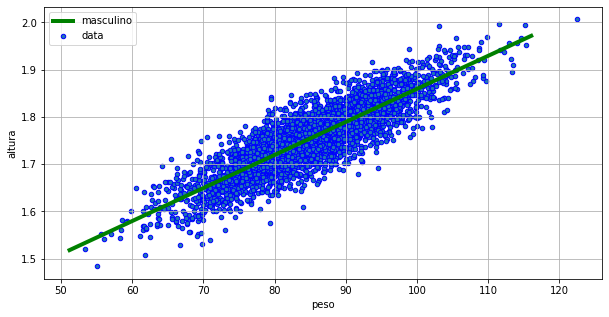

In [15]:
lx = sorted(X_test_f)
ly = lr_f.predict(lx)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="femenino", color='darkGray', lw=4)
ax.scatter(X_train_f, y_train_f, edgecolor='r', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()

lx = sorted(X_test_m)
ly = lr_m.predict(lx)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="masculino", color='g', lw=4)
ax.scatter(X_train_m, y_train_m, edgecolor='b', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Masculino')
print('Error promedio - Regresion Multilineal:', mean_absolute_error(y_test_m, y_hat_m))
print('Error MSE - Regresion Multilineal:', mean_squared_error(y_test_m, y_hat_m))
print('Femenino')
print('Error promedio - Regresion Multilineal:', mean_absolute_error(y_test_f, y_hat_f))
print('Error MSE - Regresion Multilineal:', mean_squared_error(y_test_f, y_hat_f))

Masculino
Error promedio - Regresion Multilineal: 0.028758467896592643
Error MSE - Regresion Multilineal: 0.0012874632434286156
Femenino
Error promedio - Regresion Multilineal: 0.028069090771314545
Error MSE - Regresion Multilineal: 0.0012731979130369017
